<a href="https://colab.research.google.com/github/Antony-gitau/machine_learning_playground/blob/main/python_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What we are covering.
- data preparation
- building a model
- fitting the model to data aka training
- making predictions aka inference
- saving and loading a model

In [2]:
import torch
from torch import nn # import pytorch building  blocks
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

Data preparation
- excel spreadsheet
- images
- videos
- DNA
- text

task
- get data into a numerical representation (tensors)
- build a model to learn the patterns (learn representations)
- do something with the representation (like is this spam email or not)

linear regression formula to make a straight line with known parameters

*parameters are the things the model learns.

In [3]:
# paramters
weight = 0.7
bias = 0.3

In [9]:
#create some numbers between 0 and 1 with a 0.02 difference
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [10]:
# firt values of X and y
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

In [13]:
#splitting data into train and test sets
train_split = int(0.8 * (len(X)))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [15]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  "plor the training, test, and compare predictions"
  plt.figure(figsize=(10, 7))

  #training data
  plt.scatter(train_data, train_label, c="b",s=4, label="Training data")

  #plot test
  plt.scatter(test_data, test_label, c="g", label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend()

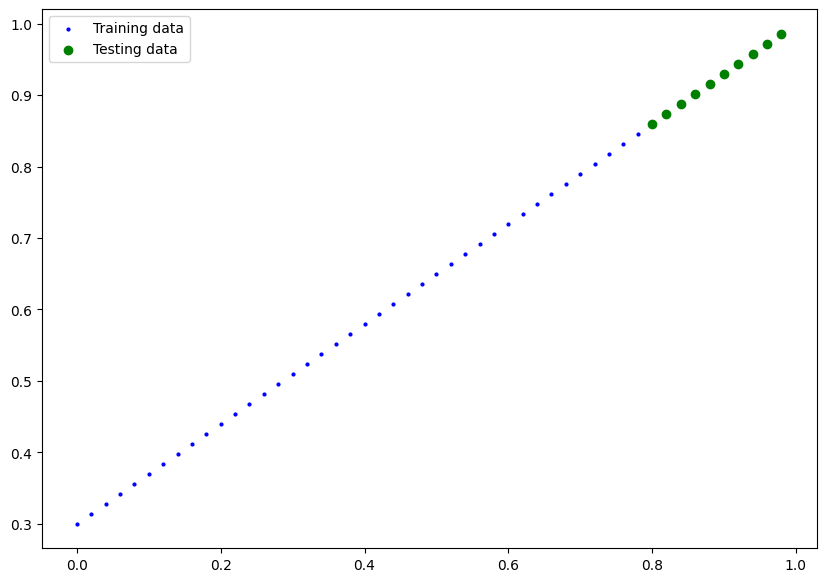

In [16]:
plot_predictions()

In [ ]:
#building a linear regression model
class linearRegressionModel(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)

    # initialize the model parameters like functions,
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # computation happening in the modal
    def forward(self, x:torch.Tensor):
      return self.weights * x + self.bias